# 1. Download the dataset 

# 2.Load the dataset into the tool. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\sowmy\Downloads\abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df['age'] = df['Rings']+1.5 #AS per the problem statement
df.drop('Rings', axis = 1, inplace = True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


#  3. Perform Below Visualizations.


### Univariate Analysis

###  Bi-Variate Analysis


### Multi-Variate Analysis

In [6]:

df[["Height", "Whole weight","Shucked weight","Viscera weight","Shell weight","age"]].describe()
    

,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


<AxesSubplot:xlabel='Whole weight', ylabel='Count'>

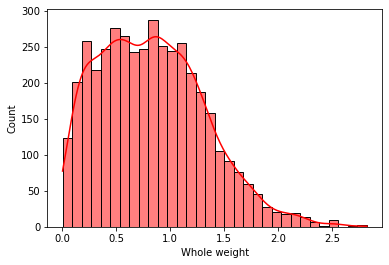

In [7]:
sns.histplot(df["Whole weight"],kde=True,color="red")

<AxesSubplot:xlabel='Height', ylabel='Count'>

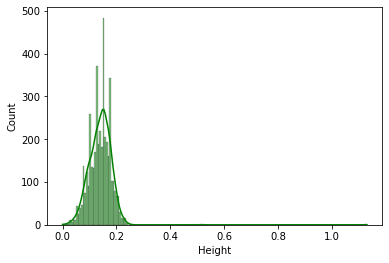

In [8]:
sns.histplot(df["Height"],kde=True,color="green")

(array([  17.,  431., 1648., 1388.,  329.,  228.,  100.,   29.,    4.,
           3.]),
 array([ 2.5,  5.3,  8.1, 10.9, 13.7, 16.5, 19.3, 22.1, 24.9, 27.7, 30.5]),
 [<matplotlib.patches.Polygon at 0x2426ff673a0>])

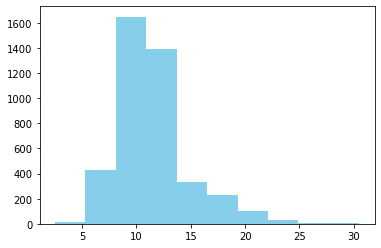

In [9]:
plt.hist(df.age,color="skyblue",histtype="stepfilled",stacked=True)


<AxesSubplot:ylabel='Height'>

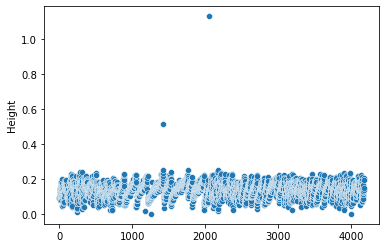

In [10]:
sns.scatterplot(df.index,df["Height"],edgecolors="red",palette="rainboq")

<AxesSubplot:xlabel='age', ylabel='count'>

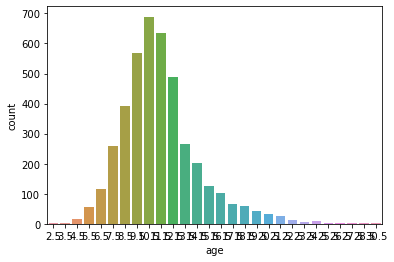

In [11]:
sns.countplot(df.age)

##### BIVARIATE

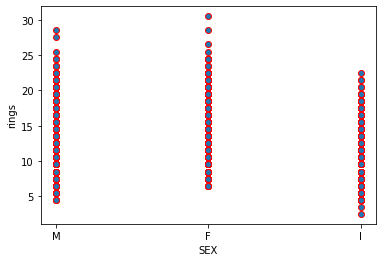

In [12]:
plt.xlabel("SEX")
plt.ylabel("rings")
plt.scatter(df["Sex"],df["age"],cmap="black",edgecolors="red")
plt.show()

#### MULTIVARIATE

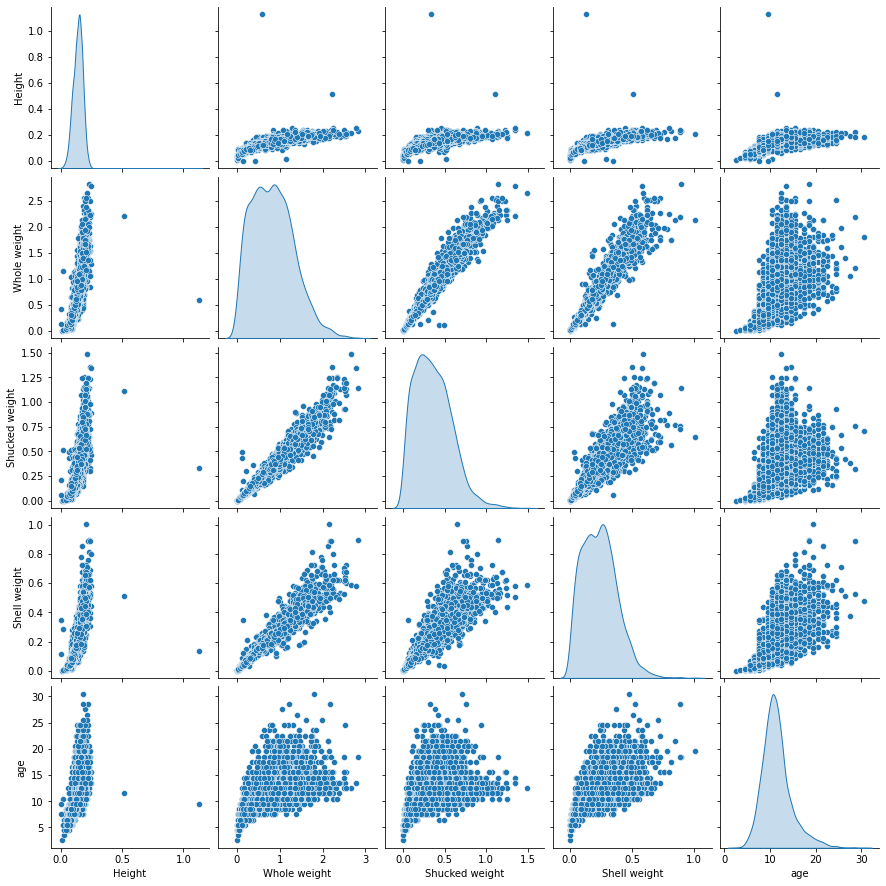

In [13]:
sns.pairplot(df[["Height","Whole weight","Shucked weight","Shell weight","age"]],diag_kind='kde')


# 4. Perform descriptive statistics on the dataset.

In [14]:
df.shape

(4177, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [16]:
import seaborn as sns
corr=df.corr()
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

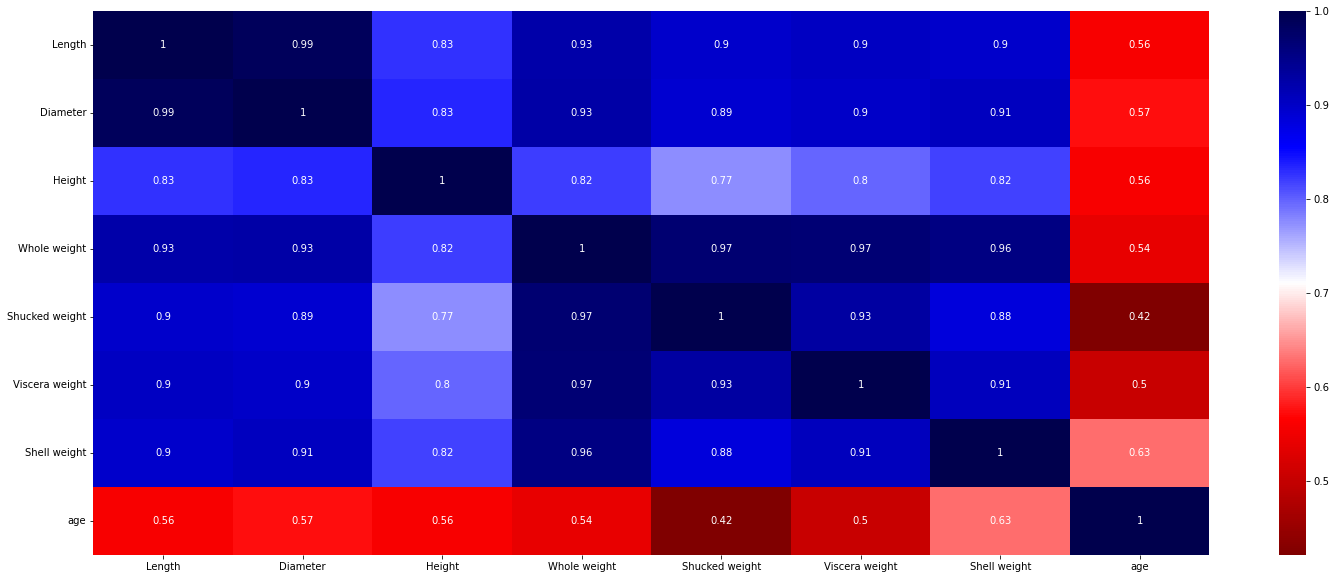

In [17]:
plt.figure(figsize=(25,10))

sns.heatmap(corr,annot=True,cmap='seismic_r')

In [18]:
df.duplicated().sum()


0

In [19]:
df.describe().style.background_gradient(cmap="viridis_r")

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


# 5. Check for Missing values and deal with them.

In [20]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

## Hence ,There is no missing values in the dataset

# 6. Find the outliers and replace them outliers

<AxesSubplot:xlabel='Length'>

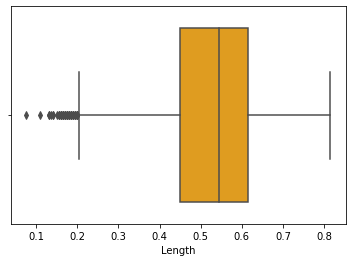

In [21]:
sns.boxplot(x=df["Length"],color="orange")


<AxesSubplot:xlabel='Sex', ylabel='age'>

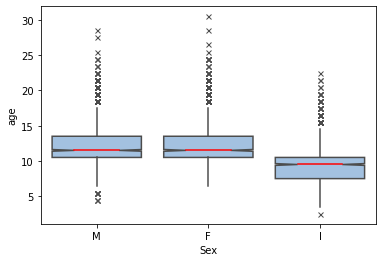

In [22]:
sns.boxplot(
    data=df, x="Sex", y="age",
    notch=True, showcaps=False,color="red",
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .6)},
    medianprops={"color": "red"},
)

<AxesSubplot:xlabel='Height'>

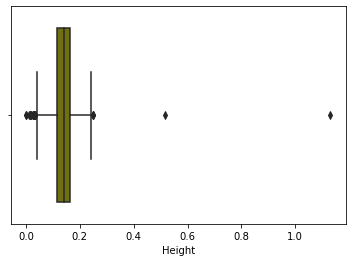

In [23]:
sns.boxplot(x=df["Height"],color="olive")


<AxesSubplot:xlabel='Whole weight'>

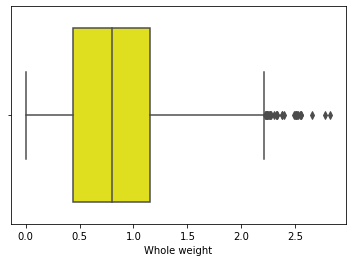

In [24]:
sns.boxplot(x=df["Whole weight"],color="yellow")


In [25]:
# print(sns.boxplot(x=df["Shucked weight"],color="cyan"))

 print(sns.boxplot(x=df["Viscera weight"],color="magenta"))

## REMOVING OUTLIERS USING INTERQUARTILE RANGE

In [26]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])
        

## After Removing outliers

AxesSubplot(0.125,0.125;0.775x0.755)


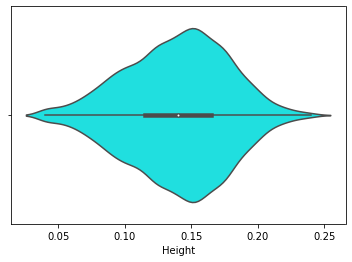

In [27]:
# print(sns.violinplot(x=df["Viscera weight"],color="pink"))
print(sns.violinplot(x=df["Height"],color="cyan"))

<AxesSubplot:xlabel='Whole weight'>

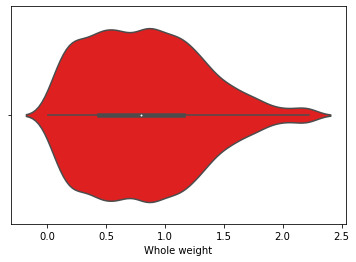

In [28]:
sns.violinplot(x=df["Whole weight"],color="red")


sns.violinplot(x=df["Viscera weight"],color="green")


<AxesSubplot:xlabel='Length'>

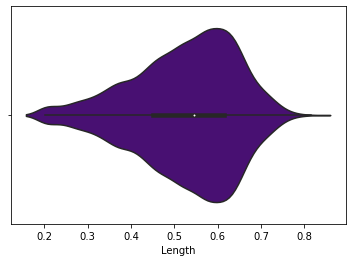

In [29]:
sns.violinplot(x=df["Length"],color="indigo")


# 7. Check for Categorical columns and perform encoding

In [30]:
for i in df:
    if df[i].dtype=='object' :
        pass
        

In [31]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] #highly correlated variables to be removed.

print("Columns to drop:\n", columns_to_drop)

Columns to drop:
 ['Diameter', 'Shucked weight', 'Viscera weight', 'Shell weight']


In [32]:
df.drop(columns_to_drop,axis=1,inplace=True)

In [34]:
df.style.background_gradient(cmap="rainbow")

### VIF

In [36]:
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
#calculating VIF
def vif_arr(df1):
    vif = pd.DataFrame()
    df1 = sma.add_constant(df1)
    vif["Features"] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    return(vif)

In [38]:
temp = df.drop('Sex', axis = 1) #i.e. categorical
vif_arr(temp).sort_values(by = 'Features', ascending = False)

,Features,VIF
0,const,69.574821
4,age,1.737613
3,Whole weight,8.566471
1,Length,9.217829
2,Height,6.526508


Text(0.5, 1.0, 'Height vs Sex')

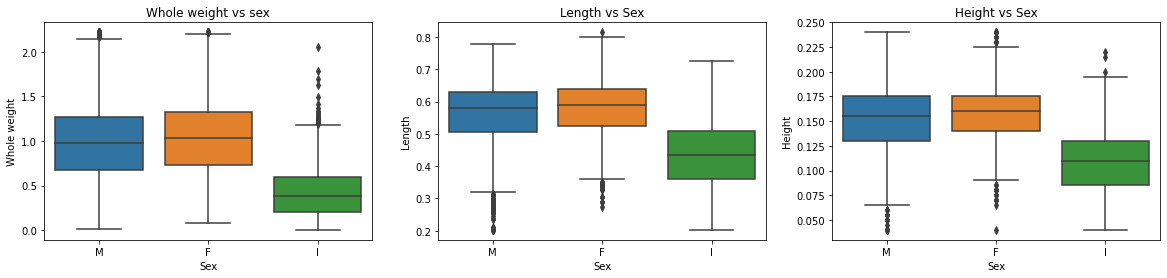

In [39]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'Sex', y = 'Whole weight', data = df, ax = axes[0])
axes[0].set_title('Whole weight vs sex')

sns.boxplot(x = 'Sex', y = 'Length', data = df, ax = axes[1])
axes[1].set_title('Length vs Sex')

sns.boxplot(x = 'Sex', y = 'Height', data = df, ax = axes[2])
axes[2].set_title('Height vs Sex')

NORMALIZE HEIGHT

In [40]:
df['Height'] = np.sqrt(df['Height'])


In [41]:
#checking skewness again
df.skew().sort_values(ascending = False)

Whole weight    0.468875
age             0.353772
Length         -0.585183
Height         -0.628345
dtype: float64

In [42]:
df.head()


,Sex,Length,Height,Whole weight,age
0,M,0.455,0.308221,0.5140,16.5
1,M,0.350,0.300000,0.2255,8.5
2,F,0.530,0.367423,0.6770,10.5
3,M,0.440,0.353553,0.5160,11.5
4,I,0.330,0.282843,0.2050,8.5


In [43]:
Age = []
for i in df["Whole weight"]:
    if i < 0.6:
        Age.append(1)
    elif i > 0.6 and i < 1.0 :
        Age.append(2)
    else:
        Age.append(3)
df["age"] = Age
#df_1.drop("age" , axis =1,inplace=True)
df.head()

,Sex,Length,Height,Whole weight,age
0,M,0.455,0.308221,0.5140,1
1,M,0.350,0.300000,0.2255,1
2,F,0.530,0.367423,0.6770,2
3,M,0.440,0.353553,0.5160,1
4,I,0.330,0.282843,0.2050,1


In [44]:
new_df = pd.get_dummies(df, columns = ['Sex'], prefix_sep='_', drop_first = True)
new_df['age'].value_counts()

1    1536
3    1473
2    1168
Name: age, dtype: int64

In [45]:
#NEW VIF
vif_arr(new_df).sort_values(by = 'Features', ascending = False)

,Features,VIF
0,const,153.949353
4,age,5.496064
3,Whole weight,10.787908
6,Sex_M,1.385335
5,Sex_I,1.991643
1,Length,10.751938
2,Height,6.134273


In [46]:
new_df['Length'] = np.sqrt(new_df['Length'])
vif_arr(new_df).sort_values(by = 'Features', ascending = False)

,Features,VIF
0,const,285.869329
4,age,5.450702
3,Whole weight,9.473924
6,Sex_M,1.385063
5,Sex_I,1.991823
1,Length,8.602648
2,Height,6.587559


In [47]:
new_df

,Length,Height,Whole weight,age,Sex_I,Sex_M
0,0.674537,0.308221,0.5140,1,0,1
1,0.591608,0.300000,0.2255,1,0,1
2,0.728011,0.367423,0.6770,2,0,0
3,0.663325,0.353553,0.5160,1,0,1
4,0.574456,0.282843,0.2050,1,1,0
...,...,...,...,...,...,...
4172,0.751665,0.406202,0.8870,2,0,0
4173,0.768115,0.367423,0.9660,2,0,1
4174,0.774597,0.452769,1.1760,3,0,1
4175,0.790569,0.387298,1.0945,3,0,0


# 8. Split the data into dependent and independent variables

In [48]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

# 9. Scale the independent variables

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

# 10. Split the data into training and testing


In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# 11. Build the Model

In [51]:
X = new_df.drop('age', axis = 1)
y = new_df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)


In [53]:
X_train = X_train_std.values
X_test = X_test_std.values
y_train = y_train.values
y_test = y_test.values

In [54]:
classifiers = {"LogisiticRegression": LogisticRegression(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier()}

In [56]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print( classifier.__class__.__name__, round(training_score.mean(), 2) * 100, "% accuracy score")

LogisticRegression 98.0 % accuracy score
KNeighborsClassifier 97.0 % accuracy score
SVC 97.0 % accuracy score
DecisionTreeClassifier 100.0 % accuracy score


# END